# Extracting Expressway Coordinates

The objective of this notebook is to extract expressway coordinates from the National Map Line GEO JSON file. 
The extracted coordinates will be saved into a csv file for use later to calculate the shortest euclidean distance from any expressway point to a HDB flat.

In [1]:
import pandas as pd
import json
import re
import numpy as np
import matplotlib.pyplot as plt

In [2]:
f = open('Data/national-map-line-geojson.geojson', 'r')
geojson = json.loads(f.read())

In [3]:
def filterExpressway(feature):
    """ Filter to be applied onto geo json features 
    to obtain only features that are Expressways.
    """
    
    description = re.findall('<td>(.*?)</td>', feature['properties']['Description'])
    if len(description) > 2:
        if description[1] == 'Layers/Expressway':
            return True
    
    return False

In [4]:
# Filter and only retain features related to expressways

geojson_express = list(filter(filterExpressway, geojson['features']))

In [6]:
# Save geojson file that only contains expressway features 
# For plotting on D3

geojson['features'] = geojson_express
with open('static/expressway-map-line.geojson', 'w') as g:
    g.write(json.dumps(geojson))

In [7]:
# Initialize empty array to store coordinates of expressway objects

express_coords = [] 

In [8]:
# Loop through features to extract only the coordinates and store in array
# Format for coordinates - list[longitude, latitude, name]

for feature in geojson_express:
    
    feature_name = re.findall('<td>(.*?)</td>', feature['properties']['Description'])[0]
    feature_coords = feature['geometry']['coordinates']
    feature_coords = [ coords[:2]+[feature_name] for coords in feature_coords]
    express_coords += feature_coords
        

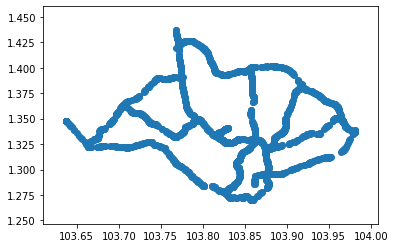

In [9]:
# Visual confirmation suggests that these coordinates are indeed those of major expressways

x, y, name = np.array(express_coords).T
plt.scatter(x.astype(float), y.astype(float))

In [10]:
# Save expressway coords to csv

with open('Data/express_coords.csv', 'w') as f:
    
    f.write('long,lat,name')
    f.write('\n')
    
    for coords in express_coords:
        
        f.write(','.join([str(x) for x in coords]))
        f.write('\n')

In [12]:
# Summary statistics for expressway coordinates
# Read in the exported coords

df_express = pd.read_csv('Data/express_coords.csv')

In [13]:
# Total number of coords

df_express.shape[0]

2568

In [15]:
# Number of coordinates per expressway

df_express['name'].value_counts()

PAN ISLAND EXPRESSWAY            706
AYER RAJAH EXPRESSWAY            299
CENTRAL EXPRESSWAY               291
KALLANG PAYA LEBAR EXPRESSWAY    264
SELETAR EXPRESSWAY               212
TAMPINES EXPRESSWAY              188
BUKIT TIMAH EXPRESSWAY           146
EAST COAST PARKWAY               143
KRANJI EXPRESSWAY                119
MARINA COASTAL EXPRESSWAY        107
LORNIE HIGHWAY                    60
SIME UNDERPASS                    22
NICOLL UNDERPASS                   7
ADAM UNDERPASS                     4
Name: name, dtype: int64